In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from pyspark.sql import SparkSession
# from pyspark.context import SparkContext 
import re
import sys
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
# path = "datasets/2010.csv"
# spark = SparkSession(sc)

## Interesting attributes

1. total_funding_amount
2. awarding_agency_name
3. awarding_sub_agency_name
4. recipient_name
5. cfda_title
6. award_description 

## Plot number of awards each FY in Colorado

In [3]:
def plot_num_awards(path, ax, title):
    df = pd.read_csv(path)
    x = [i for i in df["awarding_agency_name"].value_counts().index]
    y = [df["awarding_agency_name"].value_counts()[i] for i in x]
    for i in range(len(x)):
        x[i] = x[i][x[i].find("(")+1:-1]
    
    ax.bar(x, y)
    ax.set_title(title)


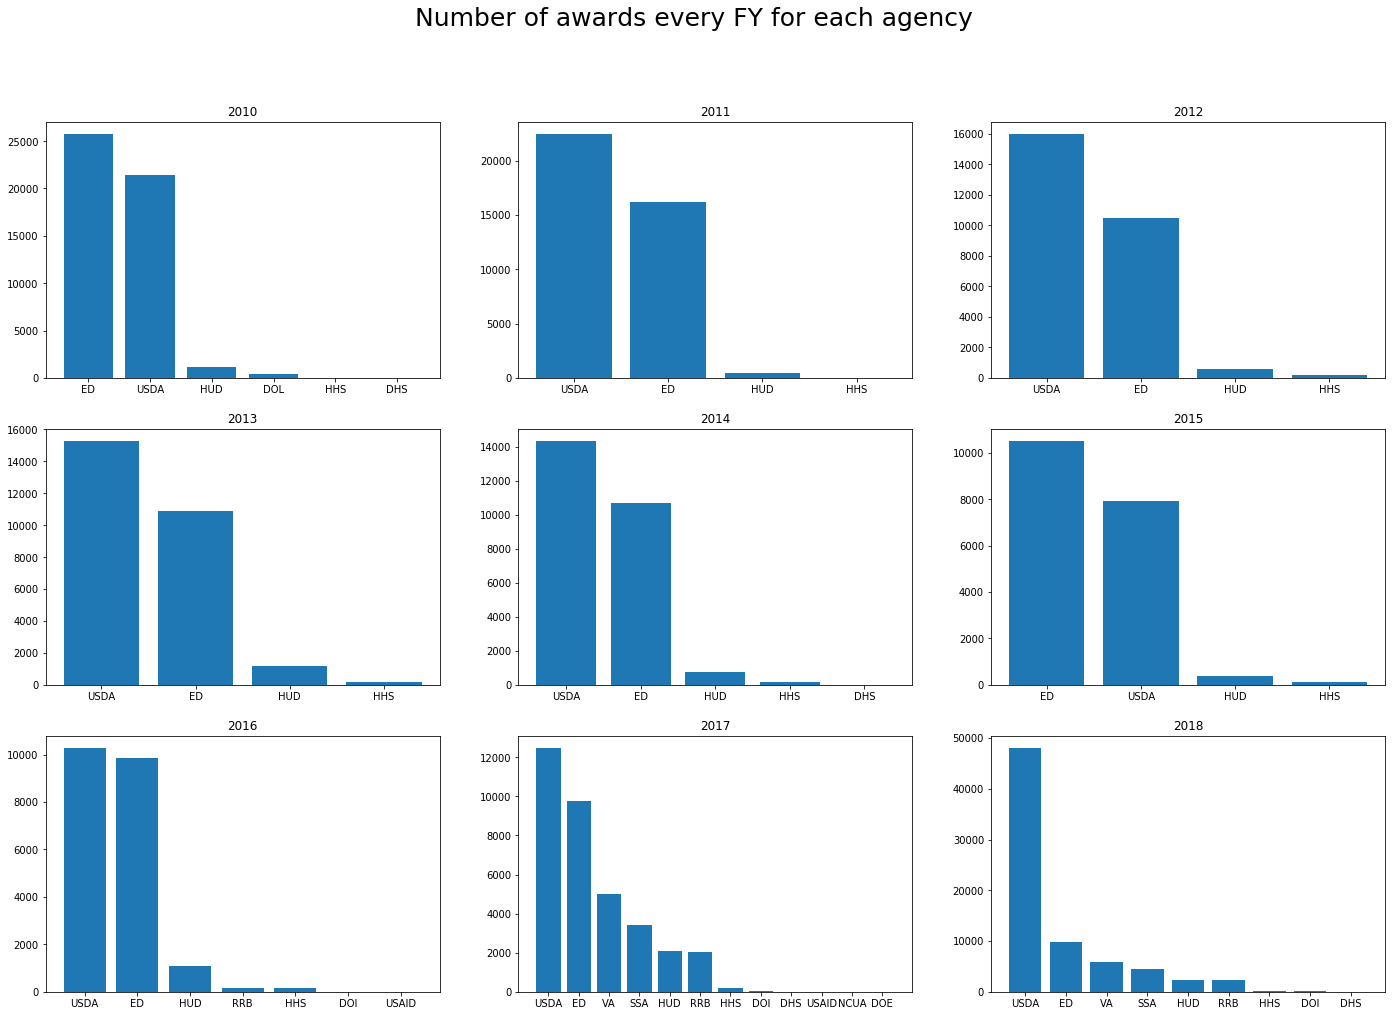

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(24, 16))
fig.suptitle("Number of awards every FY for each agency", size=25)
plot_num_awards("datasets/colorado/2010.csv", axes[0, 0], "2010")
plot_num_awards("datasets/colorado/2011.csv", axes[0, 1], "2011")
plot_num_awards("datasets/colorado/2012.csv", axes[0, 2], "2012")
plot_num_awards("datasets/colorado/2013.csv", axes[1, 0], "2013")
plot_num_awards("datasets/colorado/2014.csv", axes[1, 1], "2014")
plot_num_awards("datasets/colorado/2015.csv", axes[1, 2], "2015")
plot_num_awards("datasets/colorado/2016.csv", axes[2, 0], "2016")
plot_num_awards("datasets/colorado/2017.csv", axes[2, 1], "2017")
plot_num_awards("datasets/colorado/2018.csv", axes[2, 2], "2018")
plt.savefig("1")

## Plot total funding each FY in Colorado

In [5]:
def plot_tot_funding(path, ax, title):
    df = pd.read_csv(path)
    x = [i for i in df["awarding_agency_name"].value_counts().index]
    y = []
    for i in range(len(x)):
        y.append(df[df["awarding_agency_name"] == x[i]]["total_funding_amount"].sum()/10**6)
        x[i] = x[i][x[i].find("(")+1:-1]
    
    ax.bar(x, y)
    ax.set_title(title)


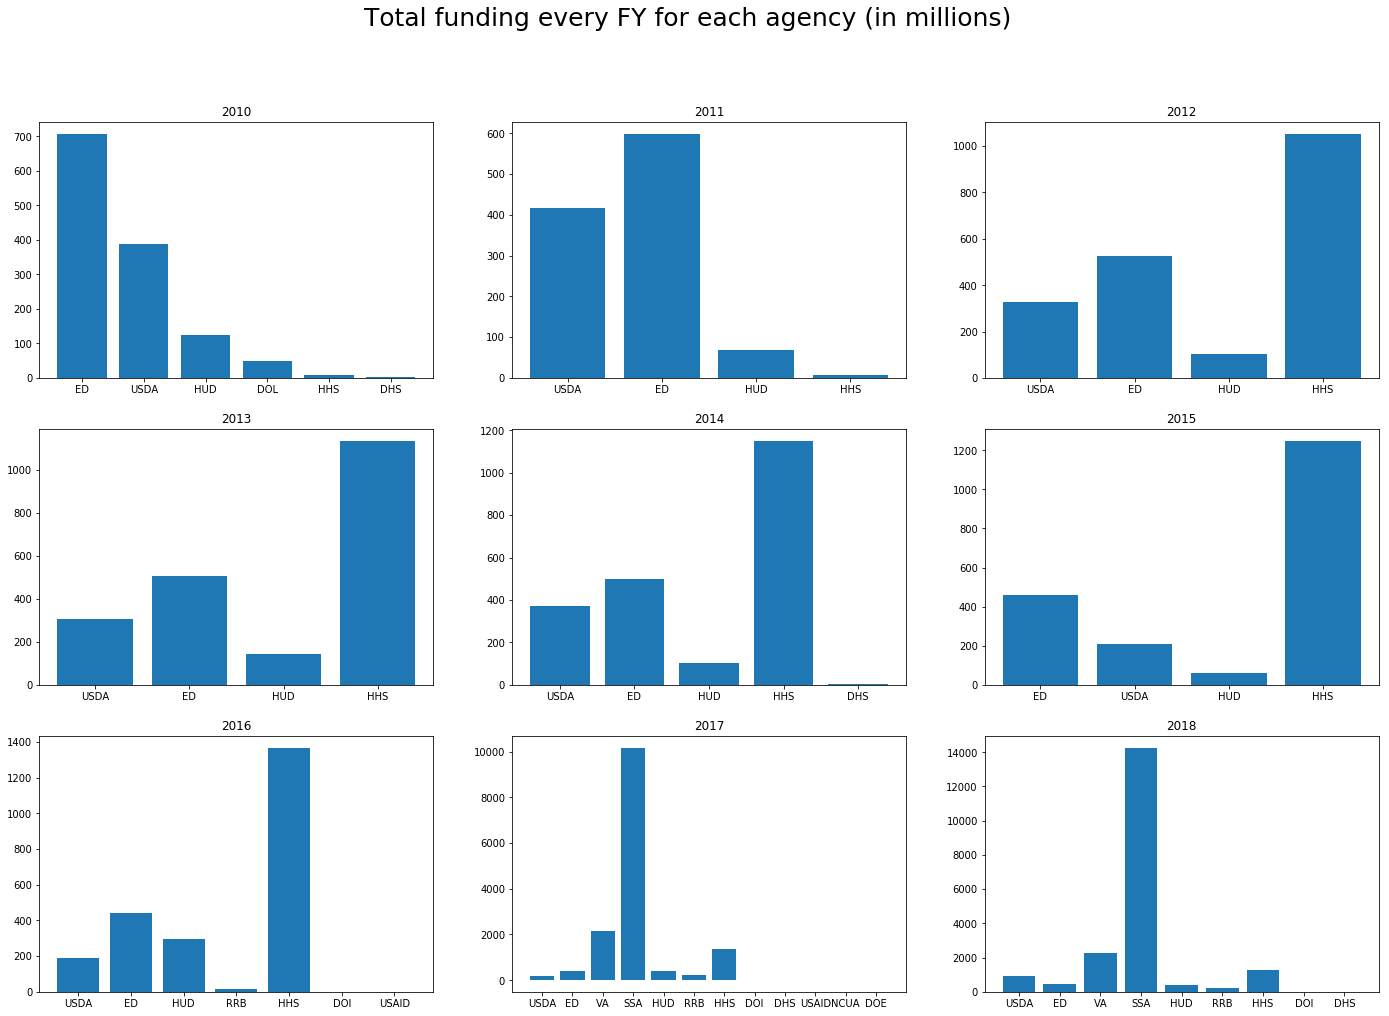

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(24, 16))
fig.suptitle("Total funding every FY for each agency (in millions)", size=25)
plot_tot_funding("datasets/colorado/2010.csv", axes[0, 0], "2010")
plot_tot_funding("datasets/colorado/2011.csv", axes[0, 1], "2011")
plot_tot_funding("datasets/colorado/2012.csv", axes[0, 2], "2012")
plot_tot_funding("datasets/colorado/2013.csv", axes[1, 0], "2013")
plot_tot_funding("datasets/colorado/2014.csv", axes[1, 1], "2014")
plot_tot_funding("datasets/colorado/2015.csv", axes[1, 2], "2015")
plot_tot_funding("datasets/colorado/2016.csv", axes[2, 0], "2016")
plot_tot_funding("datasets/colorado/2017.csv", axes[2, 1], "2017")
plot_tot_funding("datasets/colorado/2018.csv", axes[2, 2], "2018")
plt.savefig("2")


# Q1: States characteristics and trends

* Oregon population: 4.143
* Colorado population: 5.607 million
* Arizona population: 7.016 million
* California population: 39.54 million

### A comparison of total funding between states

In [7]:
def tot_funding_states(path, year, ax, title):
    x = []
    y = []
    for state in glob.glob(path+"/*"):
        for file in glob.glob(state+"/*"):
            if year in file:
                x.append(state.replace(path+"/", ""))
                df = pd.read_csv(file)
                y.append(df["total_funding_amount"].sum()/10**6)
    ax.bar(x, y)
    ax.set_ylim(0, 125000)
    ax.set_title(title)

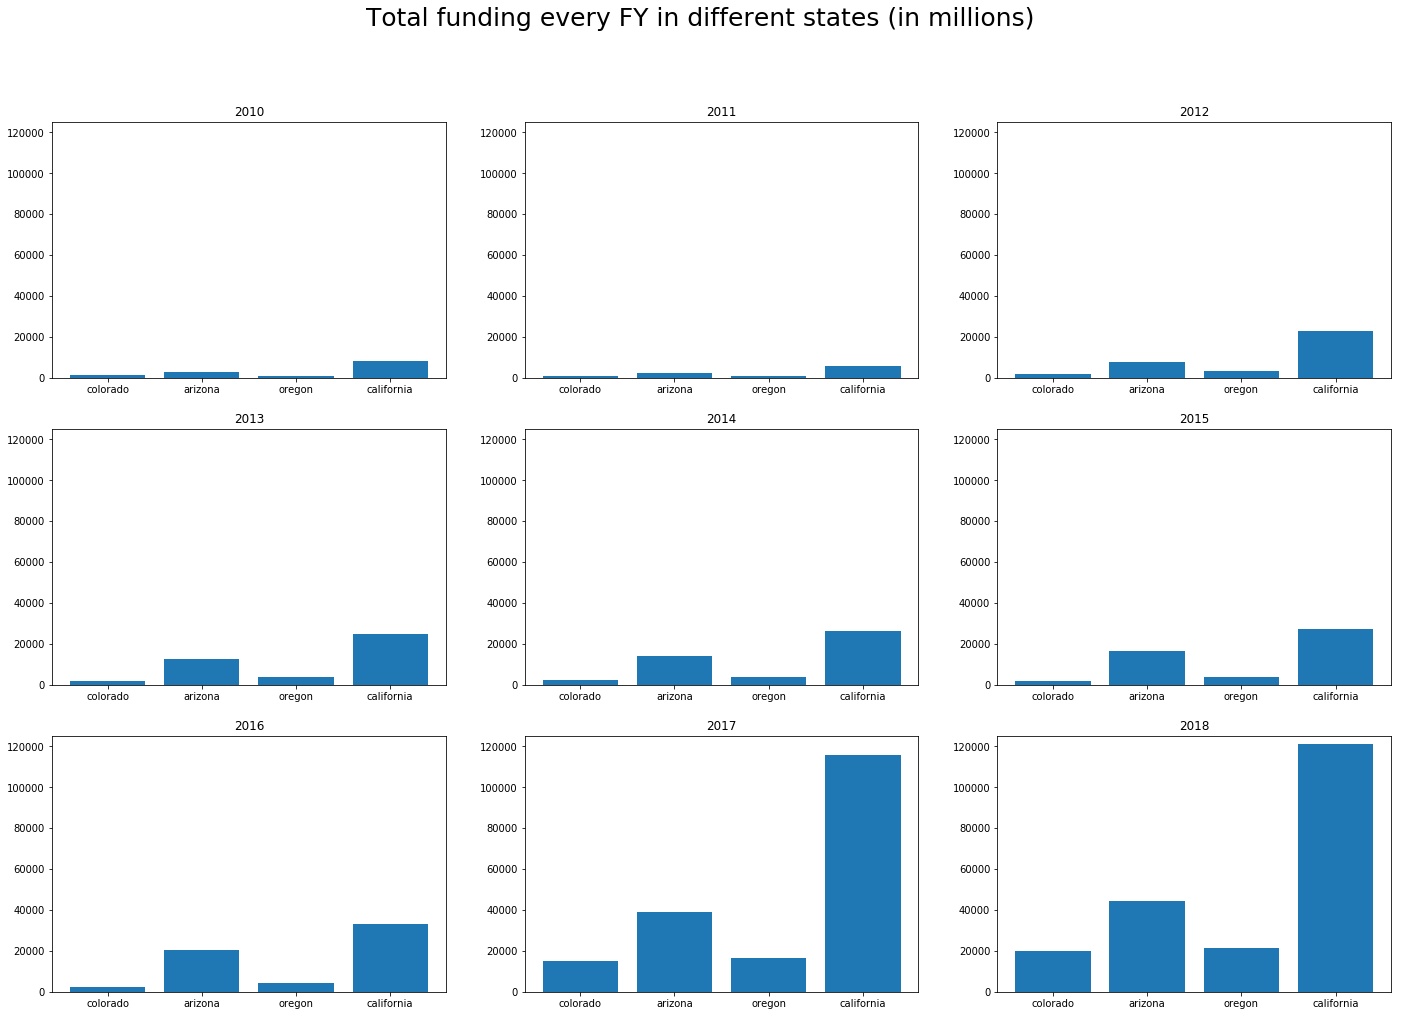

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(24, 16))
fig.suptitle("Total funding every FY in different states (in millions)", size=25)
tot_funding_states("datasets", "2010", axes[0, 0], "2010")
tot_funding_states("datasets", "2011", axes[0, 1], "2011")
tot_funding_states("datasets", "2012", axes[0, 2], '2012')
tot_funding_states("datasets", "2013", axes[1, 0], '2013')
tot_funding_states("datasets", "2014", axes[1, 1], '2014')
tot_funding_states("datasets", "2015", axes[1, 2], '2015')
tot_funding_states("datasets", "2016", axes[2, 0], '2016')
tot_funding_states("datasets", "2017", axes[2, 1], '2017')
tot_funding_states("datasets", "2018", axes[2, 2], '2018')

### A comparison of unique awards given between states

In [9]:
def uni_awards_states(path, year, ax, title):
    x = []
    y = []
    for state in glob.glob(path+"/*"):
        for file in glob.glob(state+"/*"):
            if year in file:
                x.append(state.replace(path+"/", ""))
                df = pd.read_csv(file)
                y.append(len(df["award_id_fain"].value_counts()))
    ax.bar(x, y)
    ax.set_ylim(0, 53000)
    ax.set_title(title)

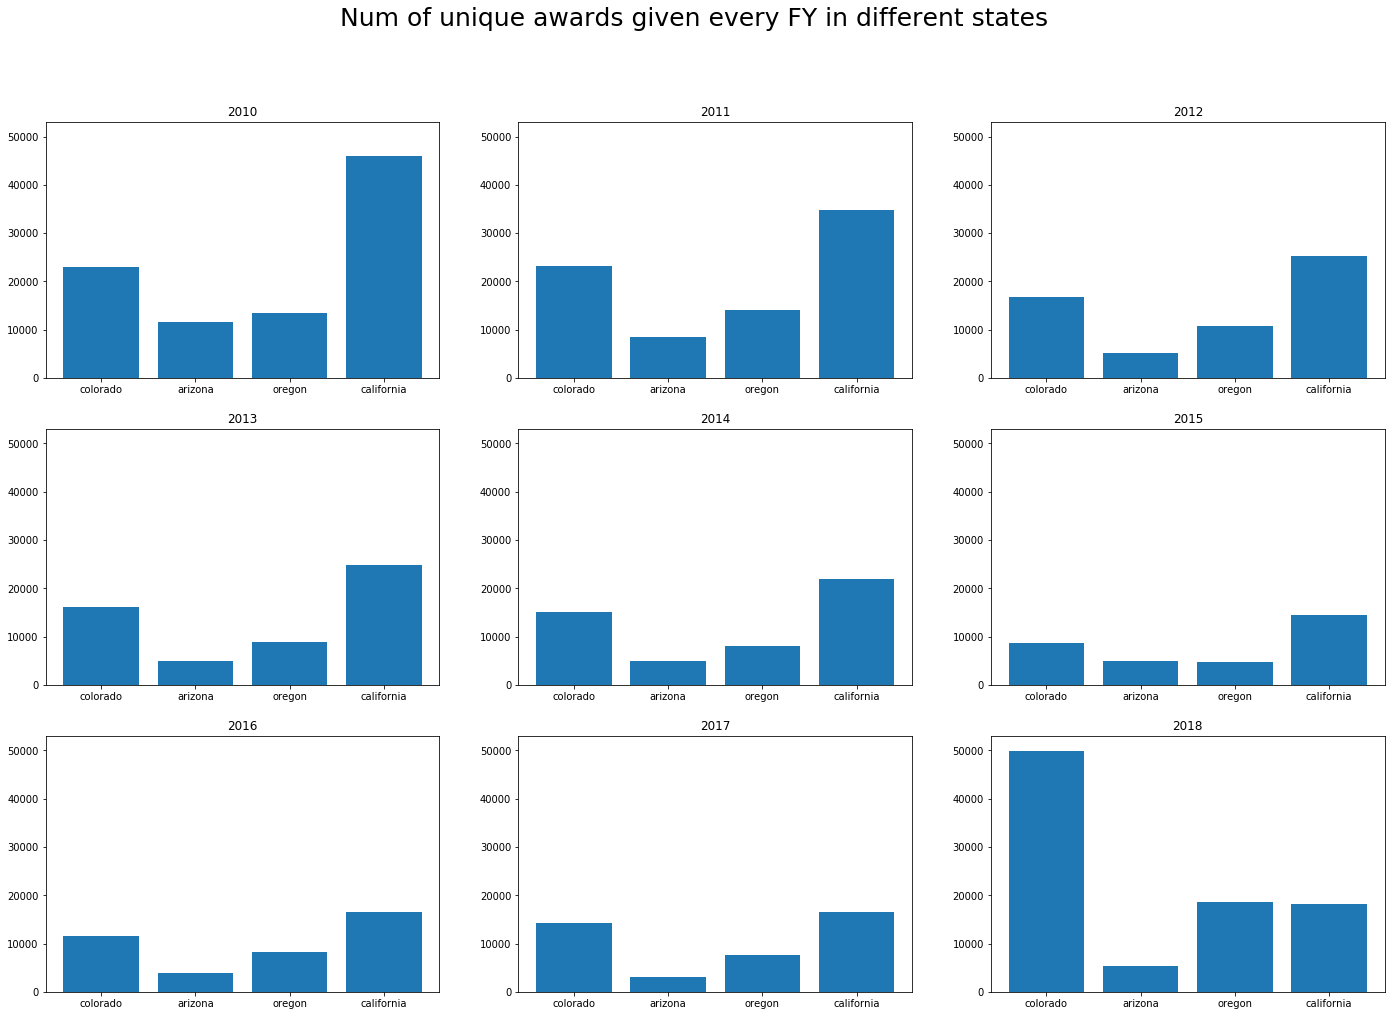

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(24, 16))
fig.suptitle("Num of unique awards given every FY in different states", size=25)
uni_awards_states("datasets", "2010", axes[0, 0], "2010")
uni_awards_states("datasets", "2011", axes[0, 1], "2011")
uni_awards_states("datasets", "2012", axes[0, 2], '2012')
uni_awards_states("datasets", "2013", axes[1, 0], '2013')
uni_awards_states("datasets", "2014", axes[1, 1], '2014')
uni_awards_states("datasets", "2015", axes[1, 2], '2015')
uni_awards_states("datasets", "2016", axes[2, 0], '2016')
uni_awards_states("datasets", "2017", axes[2, 1], '2017')
uni_awards_states("datasets", "2018", axes[2, 2], '2018')

### A comparison of total awards given between states

In [11]:
def tot_awards_states(path, year, ax, title):
    x = []
    y = []
    for state in glob.glob(path+"/*"):
        for file in glob.glob(state+"/*"):
            if year in file:
                x.append(state.replace(path+"/", ""))
                df = pd.read_csv(file)
                y.append(len(df))
    ax.bar(x, y)
    ax.set_ylim(0, 180000)
    ax.set_title(title)

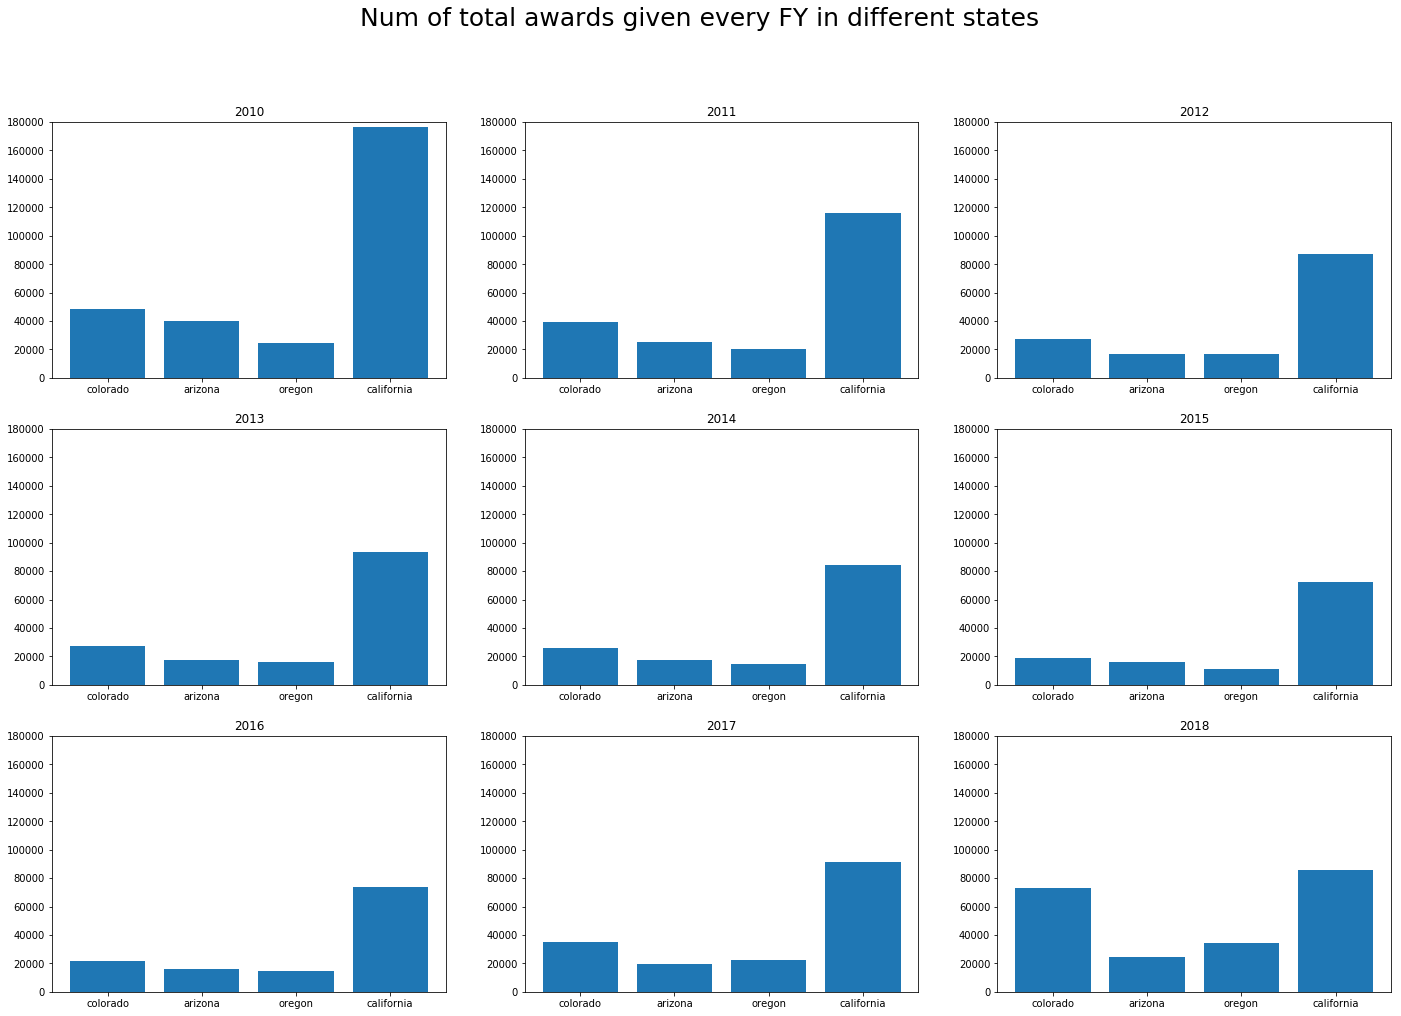

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(24, 16))
fig.suptitle("Num of total awards given every FY in different states", size=25)
tot_awards_states("datasets", "2010", axes[0, 0], "2010")
tot_awards_states("datasets", "2011", axes[0, 1], "2011")
tot_awards_states("datasets", "2012", axes[0, 2], '2012')
tot_awards_states("datasets", "2013", axes[1, 0], '2013')
tot_awards_states("datasets", "2014", axes[1, 1], '2014')
tot_awards_states("datasets", "2015", axes[1, 2], '2015')
tot_awards_states("datasets", "2016", axes[2, 0], '2016')
tot_awards_states("datasets", "2017", axes[2, 1], '2017')
tot_awards_states("datasets", "2018", axes[2, 2], '2018')


### Histograms of amounts of fundings in each state

In [13]:
def hist_amount_awards(path, year, start, end, limit, bin_size):
    fig, axes = plt.subplots(1, 4, figsize=(14, 6))
    i = 0
    for state in glob.glob(path+"/*"):
        for file in glob.glob(state+"/*"):
            if year in file:
                df1 = pd.read_csv(file)
                df2 = df1[(df1["total_funding_amount"] > start) & (df1["total_funding_amount"] < end)]
                bins = [i for i in range(start, end+100, bin_size)]
                axes[i].hist(df2["total_funding_amount"], bins=bins)
                axes[i].set_title(state.replace(path+"/", ""))
                axes[i].set_ylim(0, limit)
                axes[i].text(end/10, limit-500, "{:.3f}% of tot funding".format(len(df2)/len(df1)*100))
                i += 1
    plt.show()

Year: 2010


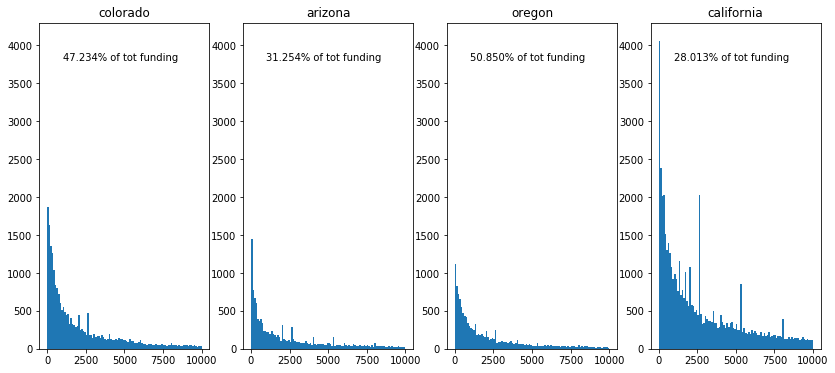

Year: 2011


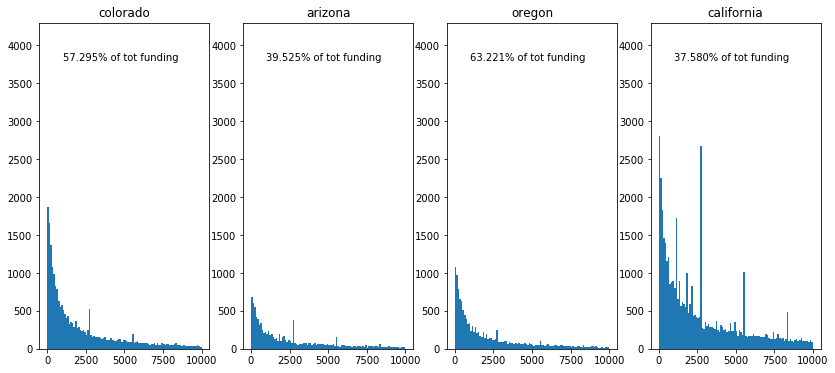

Year: 2012


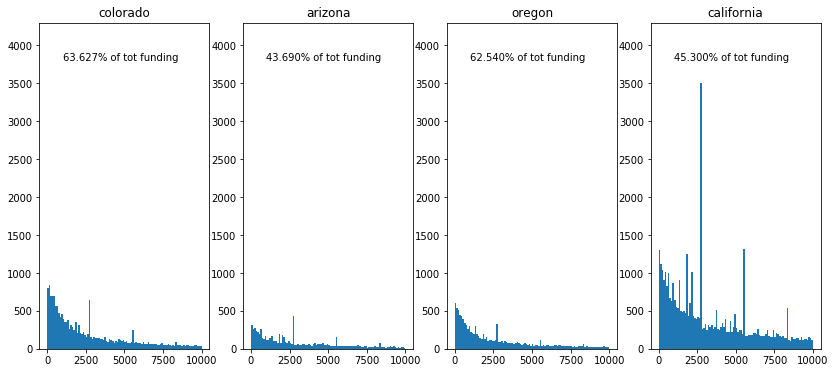

Year: 2013


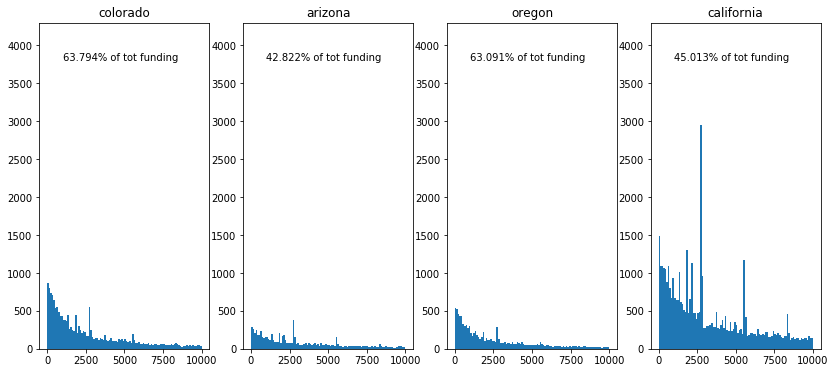

Year: 2014


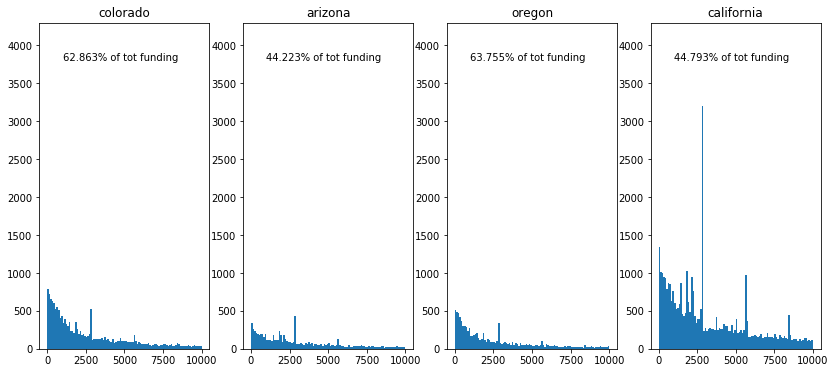

Year: 2015


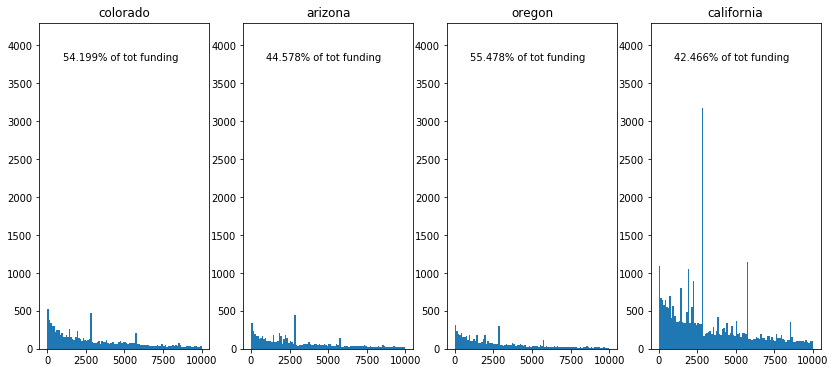

Year: 2016


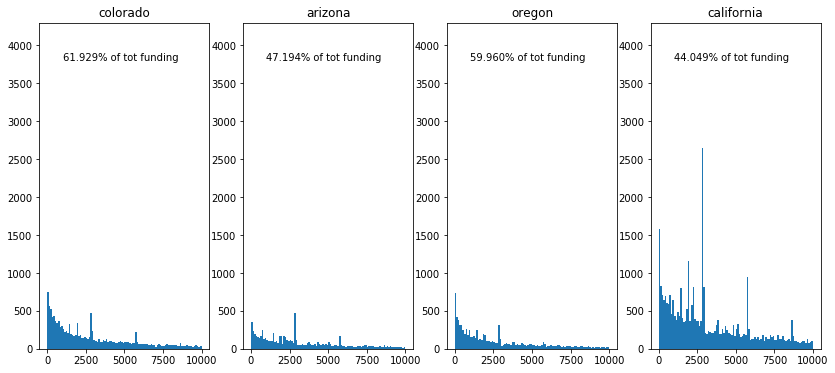

Year: 2017


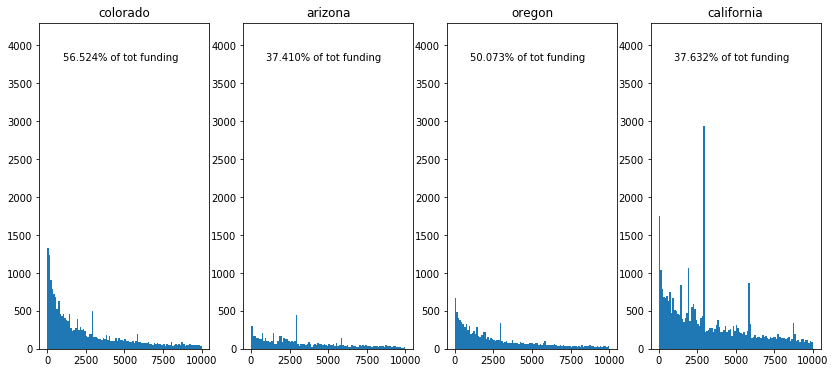

Year: 2018


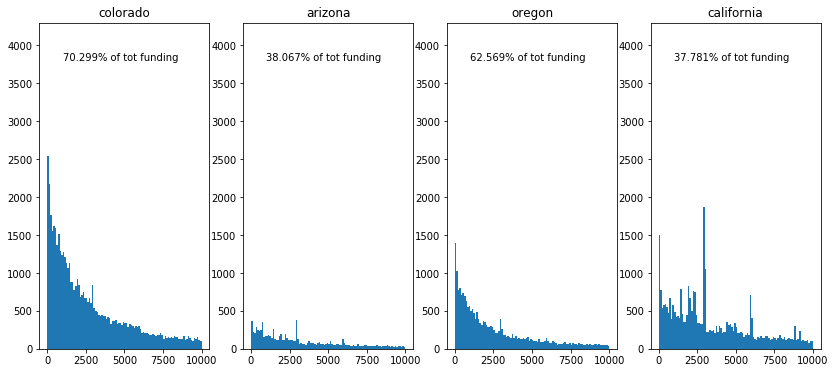

In [14]:
print("Year: 2010")
hist_amount_awards("datasets", "2010", 0, 10000, 4300, 100)
print("Year: 2011")
hist_amount_awards("datasets", "2011", 0, 10000, 4300, 100)
print("Year: 2012")
hist_amount_awards("datasets", "2012", 0, 10000, 4300, 100)
print("Year: 2013")
hist_amount_awards("datasets", "2013", 0, 10000, 4300, 100)
print("Year: 2014")
hist_amount_awards("datasets", "2014", 0, 10000, 4300, 100)
print("Year: 2015")
hist_amount_awards("datasets", "2015", 0, 10000, 4300, 100)
print("Year: 2016")
hist_amount_awards("datasets", "2016", 0, 10000, 4300, 100)
print("Year: 2017")
hist_amount_awards("datasets", "2017", 0, 10000, 4300, 100)
print("Year: 2018")
hist_amount_awards("datasets", "2018", 0, 10000, 4300, 100)

### Q1 conclusion:
1. The bigger the population, the bigger the total funding.
2. Number of unique and total awards given can be affected by the population, but not necessarily.
3. The histograms show the amounts of awards given in different states, in different years. They also show the percentage.
4. From the example above, we can see that Colorado and Arizona have higher percentage compared to Arizona and California. The histograms above show the frequency of the amounts of awards given (0 to 10000 dollars) and the percentage of the total awards given.
5. I do not think we can draw solid conclusion depending on the population or the geography of the states. We need more data.